## Project Overview
This project focuses on predicting house prices using machine learning techniques. The dataset contains various features about the houses, such as size, location, and quality.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df = df.drop('Id', axis=1)

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<Axes: >

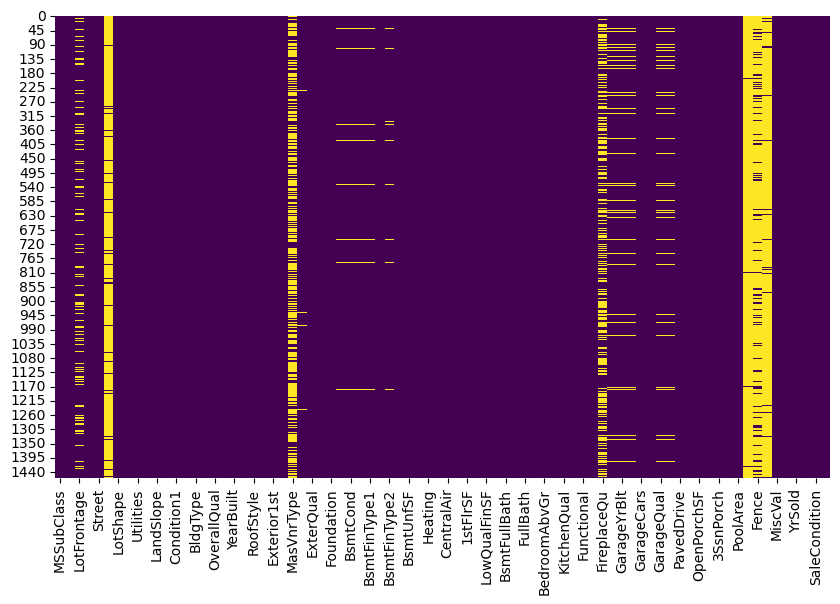

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Handling Missing Values

In [15]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [16]:
cols= ['PoolQC','MiscFeature','Alley','Fence']
df.drop(columns=cols,inplace=True)

In [17]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print(f"Categorical columns: {cat_col}\n")
num_col = [col for col in df.columns if df[col].dtype != 'object']
print(f"Numerical columns: {num_col}")

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [18]:
df[cat_col] = df[cat_col].fillna('None')

In [19]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [20]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [21]:
df[num_col] = df[num_col].fillna(0)

In [22]:
df.isnull().sum().sort_values(ascending=False)


MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

## Exploratory Data Analysis 
We explore the dataset using visualizations like heatmaps and scatter plots to understand the relationships between features and the target variable.


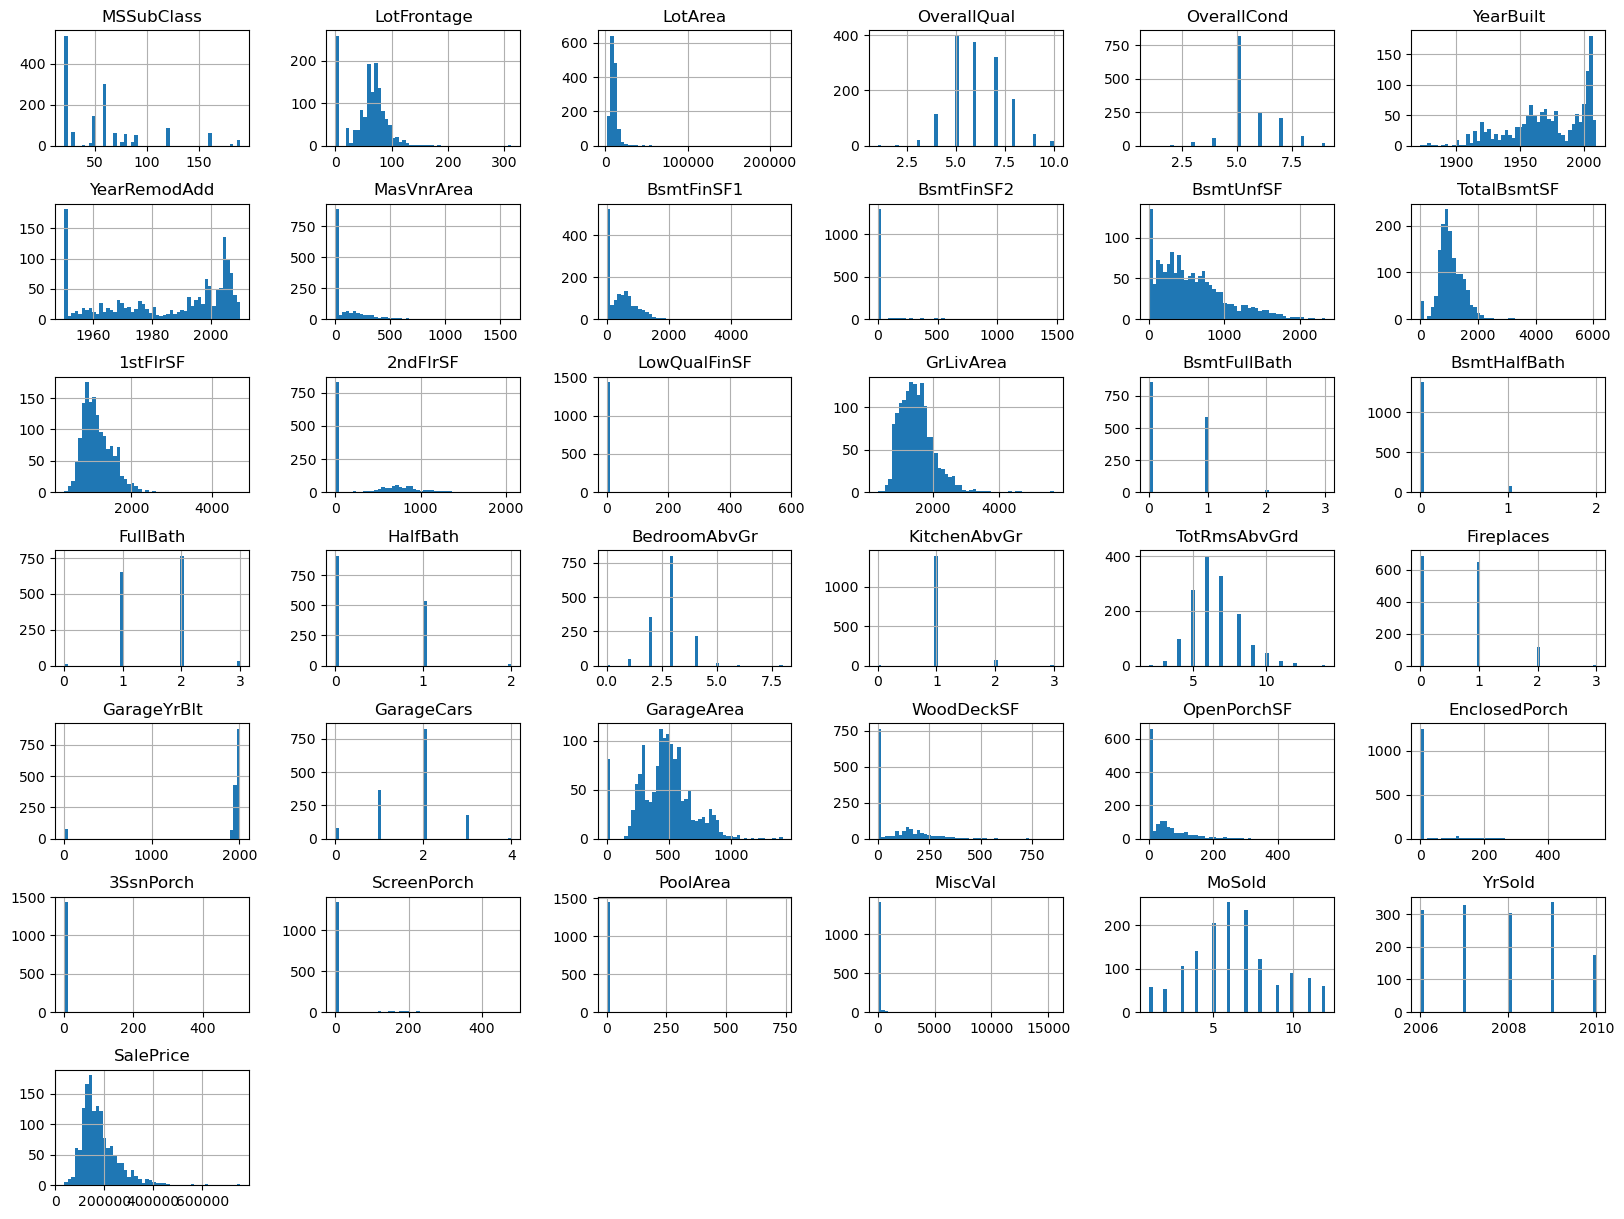

In [24]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.4) 

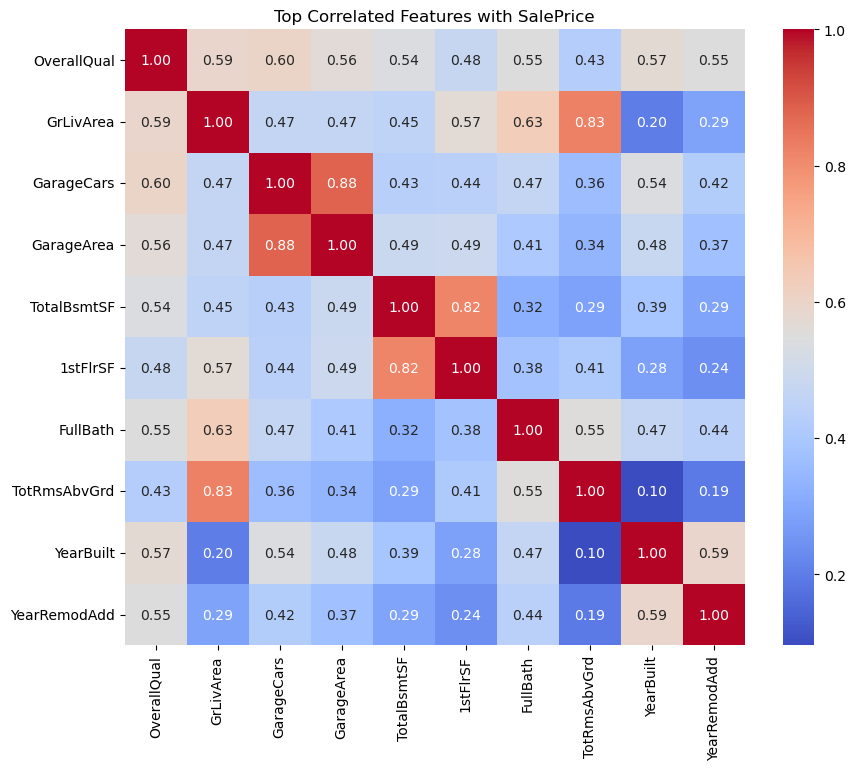

In [30]:
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
top_features = corr[1:11].index 
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with SalePrice')
plt.show()

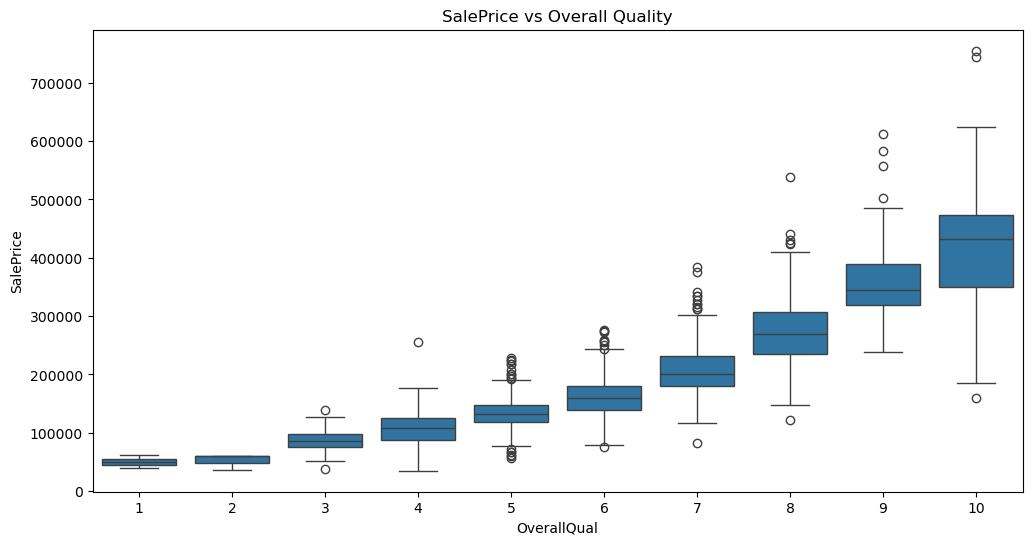

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs Overall Quality')
plt.show()


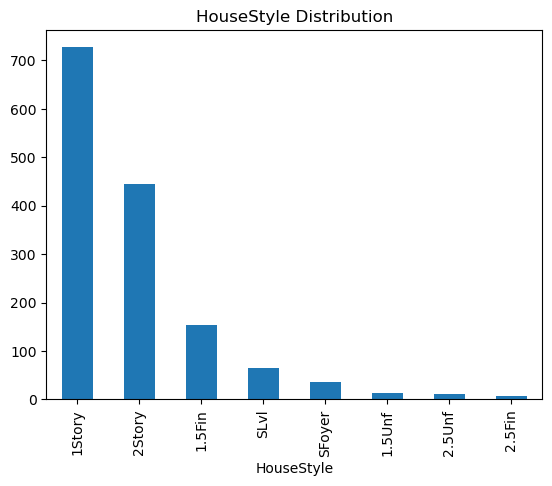

In [36]:
df['HouseStyle'].value_counts().plot(kind='bar')
plt.title('HouseStyle Distribution')
plt.show()


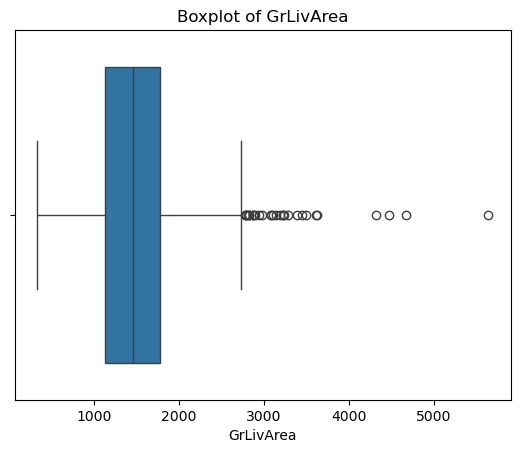

In [37]:
#outlier detection
sns.boxplot(x=df['GrLivArea'])
plt.title('Boxplot of GrLivArea')
plt.show()

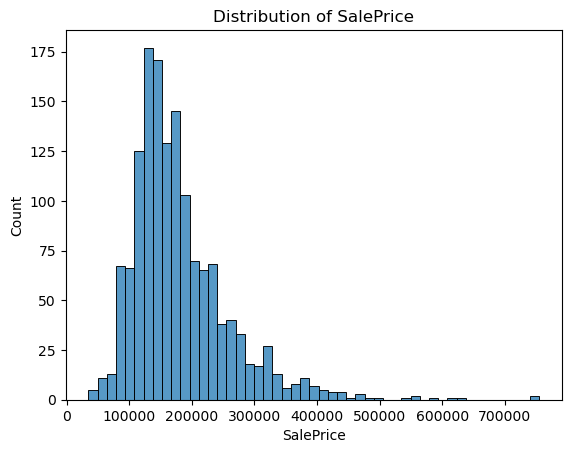

In [38]:
sns.histplot(df['SalePrice'])
plt.title('Distribution of SalePrice')
plt.show()


## Feature Engineering and Model Training
After handling missing values and encoding categorical data, we trained various regression models and evaluated their performance using metrics like RMSE and R² score.


In [52]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
ordinal_features = ['ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC']
encoder = LabelEncoder()
for feature in ordinal_features:
    df[feature] = encoder.fit_transform(df[feature])

In [55]:
df = pd.get_dummies(df, drop_first=True)

In [56]:
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = df['YrSold'] - df['YearBuilt']

In [60]:
X_Train = df.drop(['SalePrice'], axis=1)
y_Train = df['SalePrice']


In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_Train)

In [63]:
test_df = pd.read_csv('test.csv')

In [66]:
missing = test_df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

In [67]:
cols= ['PoolQC','MiscFeature','Alley','Fence']
test_df.drop(columns=cols,inplace=True)

In [68]:
test_df[cat_col] = test_df[cat_col].fillna('None')

In [71]:
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [73]:
num_col = [col for col in test_df.columns if test_df[col].dtype != 'object']
print(f"Numerical columns: {num_col}")

Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [74]:
test_df[num_col] = test_df[num_col].fillna(0)

In [75]:
test_df['ExterQual'] = encoder.transform(test_df['ExterQual']) 

In [76]:
test_df_encoded = pd.get_dummies(test_df)
X_test = test_df_encoded.reindex(columns=X_Train.columns, fill_value=0)

In [77]:
X_test_scaled = scaler.transform(X_test) 

In [79]:
from sklearn.feature_selection import SelectKBest, f_regression
X_numeric = X_Train.select_dtypes(include=['int64', 'float64'])
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_numeric, y_Train)
selected_features = X_numeric.columns[selector.get_support()]
print("Top features selected:", selected_features.tolist())

Top features selected: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'TotalBath', 'TotalSF', 'Age']


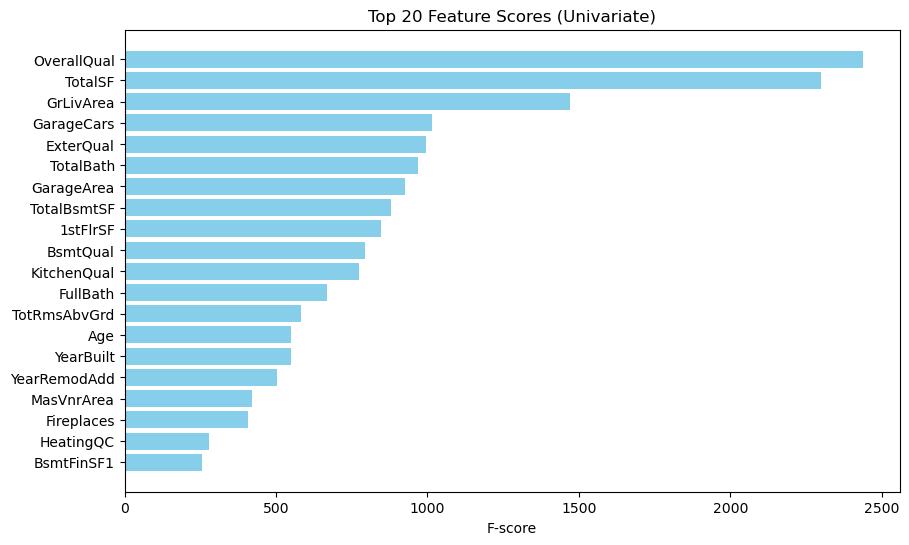

In [83]:
import matplotlib.pyplot as plt
scores = selector.scores_
features = X_numeric.columns
feature_scores = pd.DataFrame({'Feature': features, 'F_Score': scores})
feature_scores = feature_scores.sort_values(by='F_Score', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(feature_scores['Feature'], feature_scores['F_Score'], color='skyblue')
plt.xlabel('F-score')
plt.title('Top 20 Feature Scores (Univariate)')
plt.gca().invert_yaxis()
plt.show()


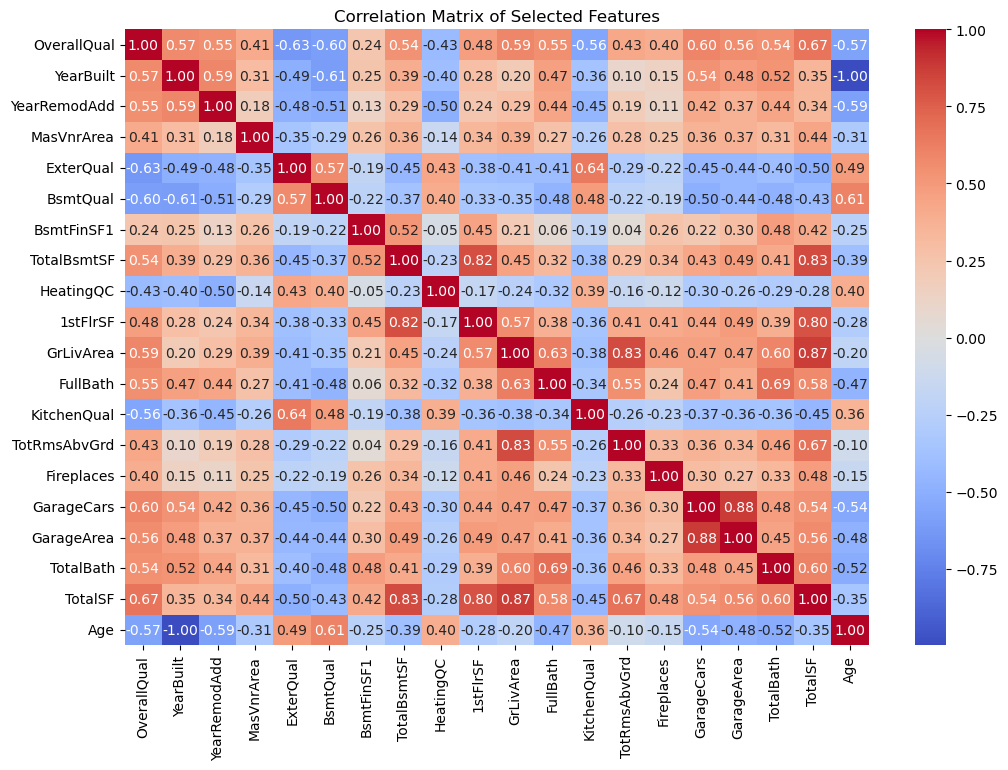

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = X_Train[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
X_vif = X_Train[selected_features]
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

         Feature           VIF
2   YearRemodAdd  18741.744658
1      YearBuilt  18235.691902
18       TotalSF   3377.226888
10     GrLivArea   1180.086080
7    TotalBsmtSF    629.815613
0    OverallQual     66.600510
13  TotRmsAbvGrd     59.184422
9       1stFlrSF     39.729408
15    GarageCars     35.943690
4      ExterQual     34.122608
17     TotalBath     33.852711
16    GarageArea     30.037925
11      FullBath     28.683121
12   KitchenQual     17.251269
19           Age     12.617479
5       BsmtQual     11.835571
6     BsmtFinSF1      4.448832
14    Fireplaces      2.760211
8      HeatingQC      2.629098
3     MasVnrArea      1.821722


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [89]:
df = pd.get_dummies(df, drop_first=True)


In [90]:
from sklearn.model_selection import train_test_split

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}:")
    print(f"  R² Score: {r2_score(y_test, preds):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}\n")


Linear Regression:
  R² Score: -1239108193887284480.0000
  RMSE: 97490327997775.98

Random Forest:
  R² Score: 0.8819
  RMSE: 30097.26



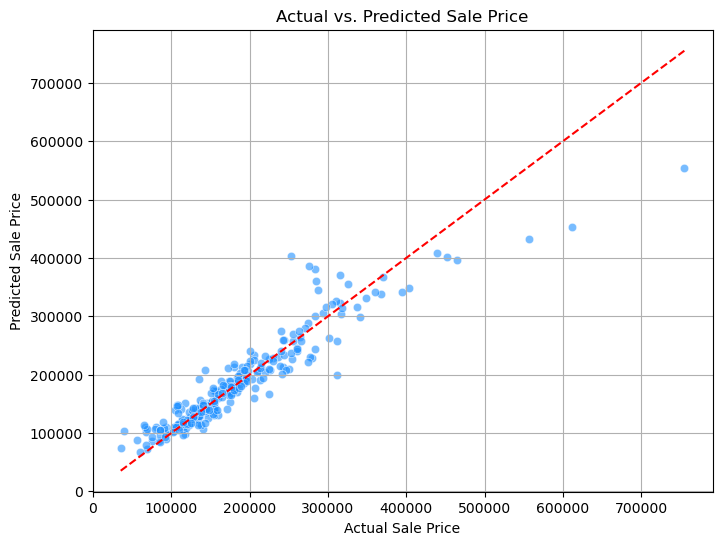

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='dodgerblue')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.grid(True)
plt.show()

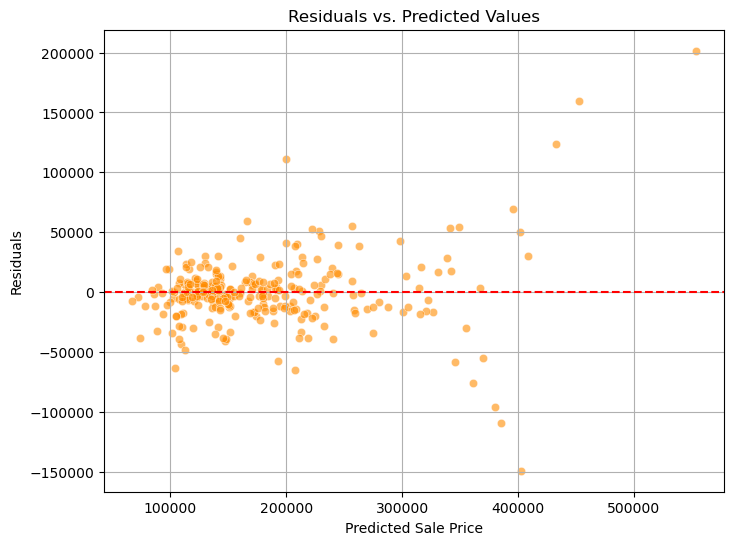

In [93]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='darkorange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()


In [94]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=random_grid,
    n_iter=10,  # Try 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': None}


In [95]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred_tuned = best_model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))

R² Score: 0.88509855509357
RMSE: 29687.22897323792


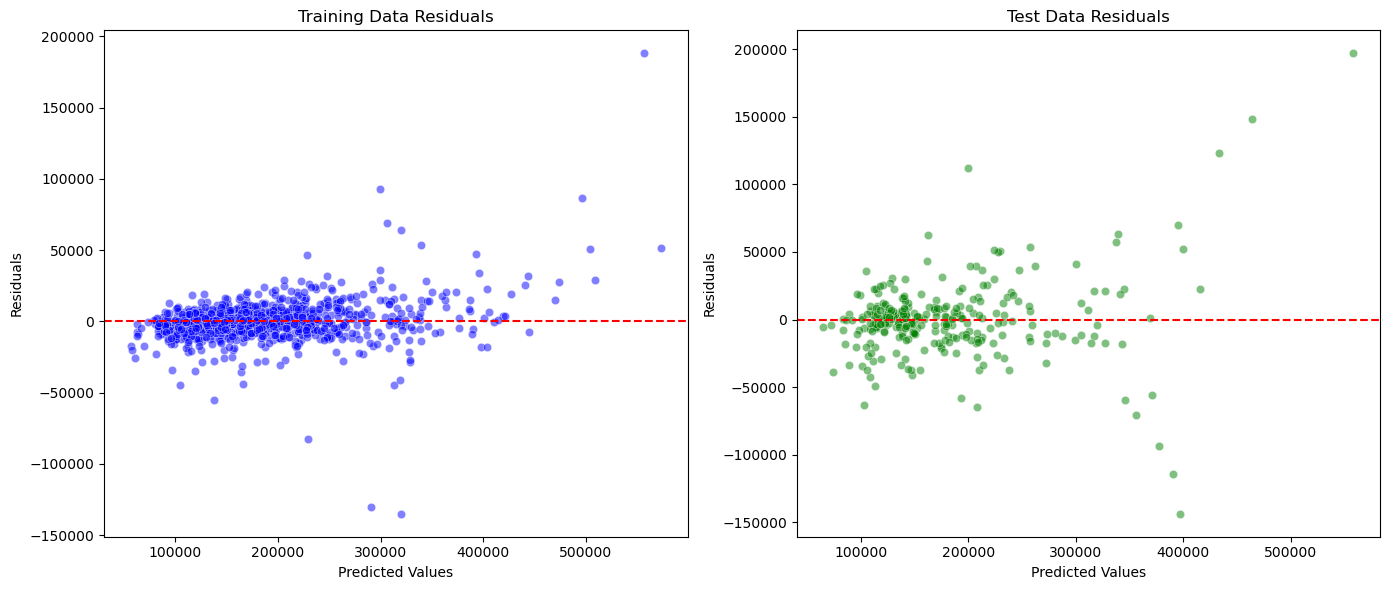

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=train_residuals, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Training Data Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Test Data Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
X_train_gbr, X_val, y_train_gbr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Gradient Boosting Performance on Validation Set:
RMSE: 24379.34181439188
MAE: 15478.433677414714
R² Score: 0.9080492329213141


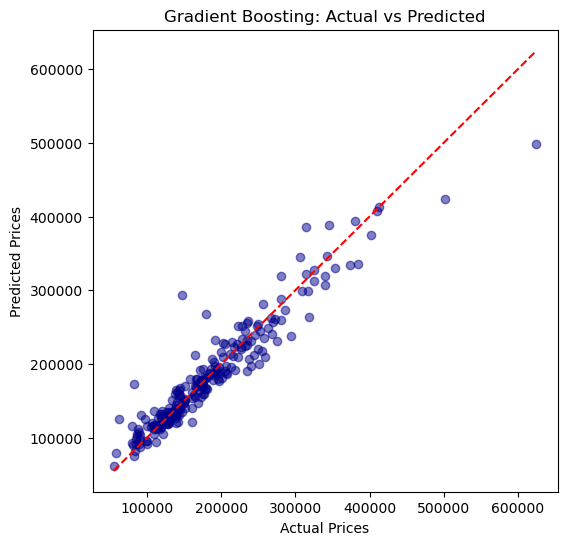

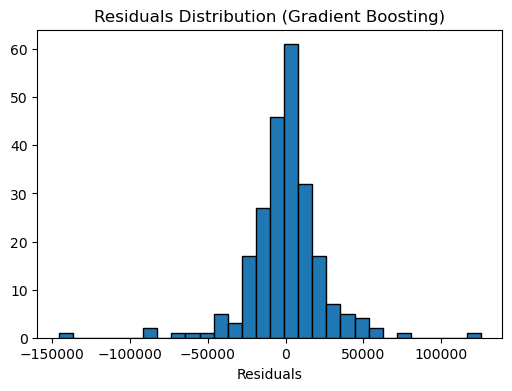

In [98]:
##Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_gbr, y_train_gbr)
y_train_pred = gbr.predict(X_train_gbr)
y_val_pred = gbr.predict(X_val)
print("Gradient Boosting Performance on Validation Set:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("MAE:", mean_absolute_error(y_val, y_val_pred))
print("R² Score:", r2_score(y_val, y_val_pred))
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='darkblue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()
residuals = y_val - y_val_pred
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Gradient Boosting)")
plt.show()

In [99]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


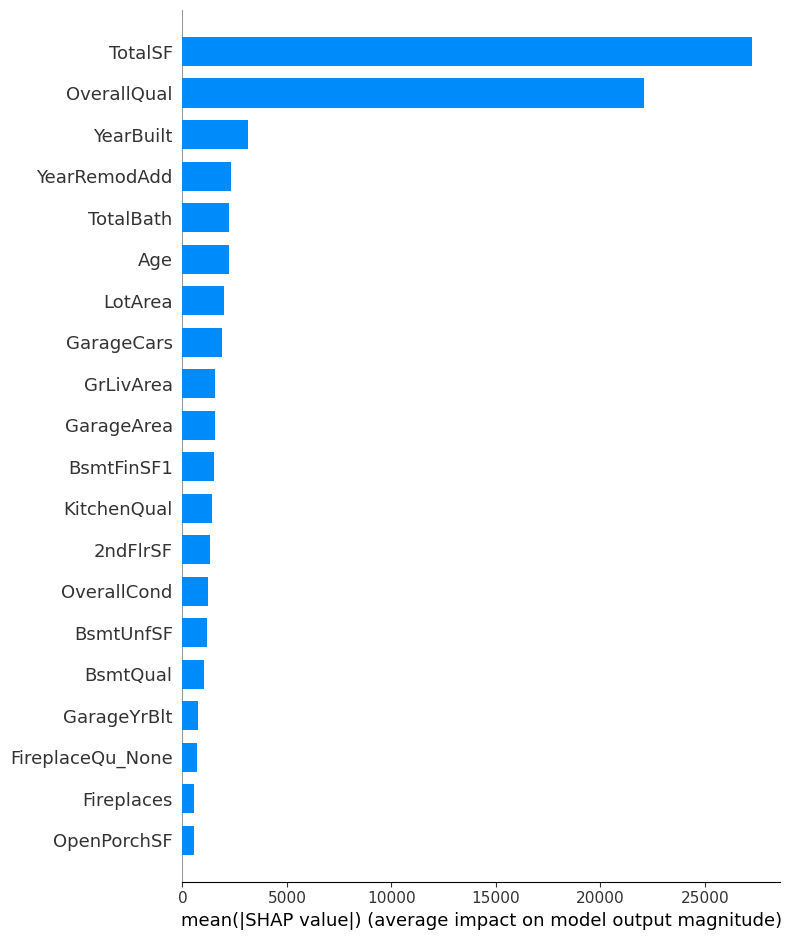

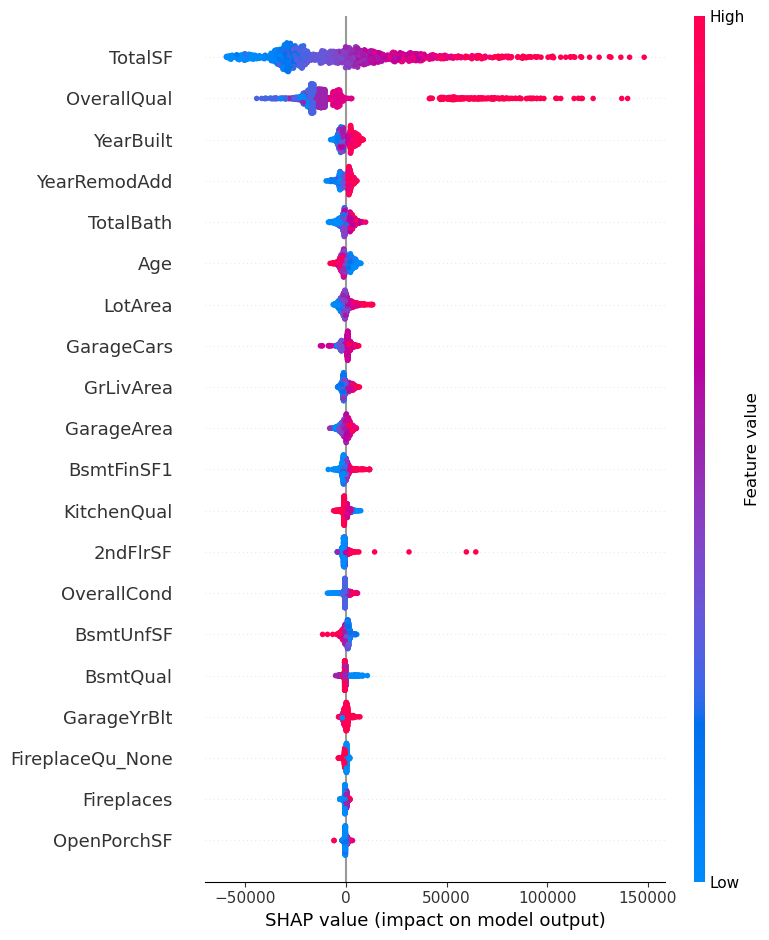

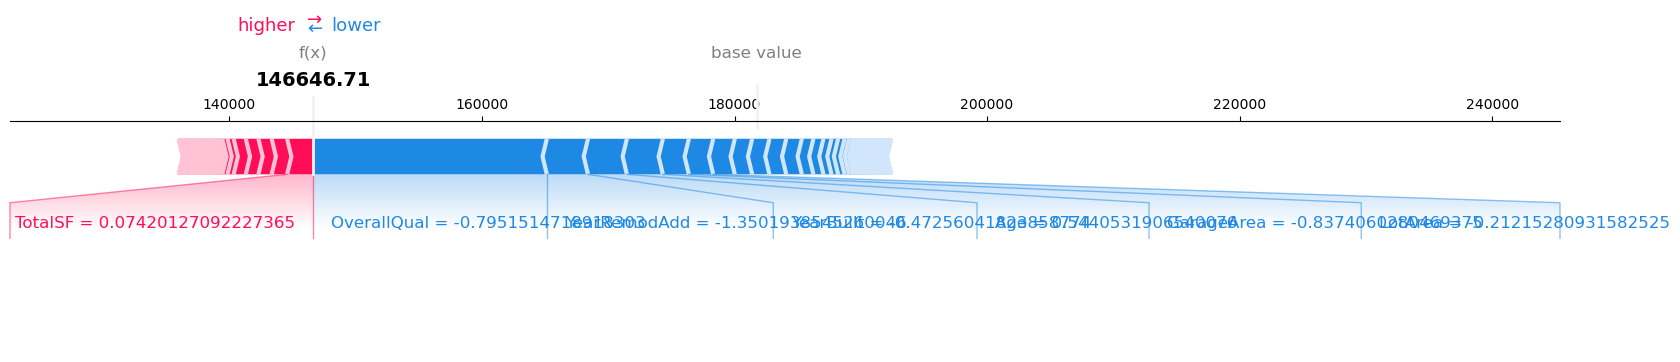

In [100]:
import shap
import matplotlib.pyplot as plt
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0].values,
    X_train.iloc[0],
    matplotlib=True
)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 30097.26
R² Score: 0.88


In [106]:
import joblib
joblib.dump(model, 'house_price_model.pkl')

['house_price_model.pkl']